# Assignment 2 - Machine Learning Basics

## Tzu-Chun Hsieh
Netid:  th264

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**  

1. A flexible statistical learning method would be better than an inflexible method because we have enough large sample data to train and more flexibility can explain the data better.

2. An inflexible statistical learning method would be better than a flexible method because we don't have enough observations to explain the p features. If we use a flexible method, we would probably overfitting the training data and the model would not perform well on other datasets.

3. A flexible statistical learning method would be better than an inflexible method. Because most inflexible statistical learning is linear. If we already know the relationship between the predictors and response is highly non-linear, we could expect that flexible statistical learning would perform better than non-flexible statistical learning.

4. An inflexible statistical learning method would be better than a flexible method. The variance of error terms is extremely high means the flexibility is too high and there might be an overfitting problem. Therefore, choosing a more inflexible statistical learning can decrease the variance and since the variance is originally extremely high, we expect the increase of bias would less than the decrease of variance.


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**  
(a)(i)Regression problem. Because the response variable, salary, is a continuous variable.  (ii)Inference. Because the main purpose of the analysis is to understand which factors affect CEO salary. (iii)n=500, p = 3.

(b)(i)Classification problem. Because the response variable is whether the new product will succeed or not, which is a binary variable. (ii)Prediction. Because in this case, the main purpose is to predict the new product will succeed or not. (iii)n=20, p =13.
 
(c)(i)Regression problem. Because the response variable is the percentage change in the US dollar. (ii)Prediction. Because the main purpose is to predict the percentage change in US dollars. (iii)n= 52, p = 3.

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [2]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [3]:
print('(a)')
#create a dataframe to calculate the distance
test_p = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
#the squared differences between the 6 observations and the test point by axis
dif_axis_s = np.multiply((X - test_p), (X - test_p))

# array for record the distance
dis = np.empty([np.size(dif_axis_s, 0), 2])
for i in range(np.size(dif_axis_s, 0)):
    #observation number
    dis[i, 0] = i + 1
    #distance between test point and the ith observation
    dis[i, 1] = np.sqrt(dif_axis_s[i].sum())


(a)


| Obs. | Distance |
|------|------|
| **1**| 3     | 
| **2**| 2     | 
| **3**| 3.16227766     | 
| **4**| 2.23606798     | 
| **5**| 1.41421356    | 
| **6**| 1.73205081     | 

In [4]:
print('(b)')
#find the y value of the nearest point to test point
p = dis[ (dis[:, 1] == dis[: , 1].min()), 0].copy()
print("Blue. Because the nearest point to the test point is point",int (p), " in the training data.")

(b)
Blue. Because the nearest point to the test point is point 5  in the training data.


In [5]:
print('(c)')
k = 3
#create the array to record the index and value of the nearest k points
k_idx_value = np.empty([k, 2])
# assign the biggest number for int variable to the value
k_idx_value[:, 1] = 2147483647
#find the index and value of the nearest k points
for idx, p in enumerate(dis[:,1]):
    if p < max(k_idx_value[:,1]):
        k_idx_value[np.argmax(k_idx_value[:,1]), 0] = idx
        k_idx_value[np.argmax(k_idx_value[:,1]), 1] = p
k_idx_value
#predict the y value for the test point
r =  b = 0
#count the y value of the nearest k points 
for idx in k_idx_value[:,0]:
    if y[int(idx)] == 'r':
        r += 1
    if y[int(idx)] == 'b':
        b += 1

#print the prediction of the test point.        
if r > b:
    print(f'Red. Because most of the y value of the nearest {k} points to the test point in the training data are Red.')
else:
    print(f'Blue. Because most of the y value of the nearest {k} points to the test point in the training data are Blue.')

(c)
Red. Because most of the y value of the nearest 3 points to the test point in the training data are Red.


(d) The highly non-linear Bayes decision boundary indicates that we need to use a flexible statistical learning method to fit the model. Therefore, the best value of K should be small since the flexibility of the KNN method is measured by $\frac{1}{K}$.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:  
(a)

In [6]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.train_x = None
        self.train_y = None
        self.test_x = None
        #self.k = None
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.train_x = x
        self.train_y = y
            
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        
        self.test_x = x
        #the number of observations in the training data and test data
        n_train = np.size(self.train_x, 0)
        n_test = np.size(self.test_x, 0)
        #initialize the array recording the distance 
        dis = np.empty([n_train, n_test])
        #loop over all the observations in test data
        for i in range(n_test):
            #duplicate the row in test data in order to calculate the distance to each point in the training data
            temp_test = np.repeat([self.test_x[i,:]], n_train, axis = 0)
            #calculate the square distance in every axis 
            temp_test = temp_test -  self.train_x
            temp_test = np.multiply(temp_test, temp_test)
            #calculate the distance between the test point and the training points and assign it to the dis array
            for j in range(n_train):
                dis[j, i] = np.sqrt(temp_test[j].sum())
        #predict the y value for each point in test x using dis array
        #initialize the list to record the y value of the k nearest points
        k_y_value = []
        for l in range(n_test):
            #zip distance and y value together and sorted
            d, y_value = zip(*sorted(zip(dis[:, l], self.train_y)))
            #get the first k y values for the l th test data point
            k_y_value.append(y_value[:k])
            
        #predict the y value for each test points
        for m in range(n_test):
            (unique, counts) = np.unique(k_y_value[m], return_counts=True)
            y_hat.append(unique[np.argmax(counts)])
        
        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

(b)

In [7]:
# load all the dataset needed for this question.
import pandas as pd
A2_X_test_high = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_X_test_high.csv', delimiter=',')
A2_X_test_low = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_X_test_low.csv', delimiter=',')
A2_X_train_high = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_X_train_high.csv', delimiter=',')
A2_X_train_low = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_X_train_low.csv', delimiter=',')
A2_y_test_high = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_y_test_high.csv', delimiter=',')
A2_y_test_low = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_y_test_low.csv',delimiter=',')
A2_y_train_high = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_y_train_high.csv',delimiter=',')
A2_y_train_low = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_y_train_low.csv',delimiter=',')

(c) 

In [8]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
import time

k = 5
knn_low = Knn()
knn_high = Knn()
knn_low.fit(A2_X_train_low, A2_y_train_low)
knn_high.fit(A2_X_train_high,A2_y_train_high)

start_low = time.time()
knn_low_predict = knn_low.predict(A2_X_test_low, k)
end_low = time.time()

start_high = time.time()
knn_high_predict = knn_high.predict(A2_X_test_high, k)
end_high = time.time()

#should we build our own function to calculate the accuracy? or we can use sklearn function?
knn_low_perf = accuracy(A2_y_test_low, knn_low_predict)
knn_high_perf = accuracy(A2_y_test_high, knn_high_predict)

print(f"It takes {end_low - start_low:2f} seconds to make the prediction for the low dimensional data \nand the accuracy of the test data predictions is {knn_low_perf}")
print(f"It takes {end_high -  start_high:2f} seconds to make the prediction for the high dimensional data \nand the accuracy of the test data predictions is {knn_high_perf}")

It takes 3.728378 seconds to make the prediction for the low dimensional data 
and the accuracy of the test data predictions is 0.925
It takes 3.766014 seconds to make the prediction for the high dimensional data 
and the accuracy of the test data predictions is 0.993


(d)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_sk_low = KNeighborsClassifier(n_neighbors=k)
knn_sk_high = KNeighborsClassifier(n_neighbors=k)
knn_sk_low.fit(A2_X_train_low, A2_y_train_low)
knn_sk_high.fit(A2_X_train_high,A2_y_train_high)

start_sk_low = time.time()
knn_sk_low_predict = knn_sk_low.predict(A2_X_test_low)
end_sk_low = time.time()

start_sk_high = time.time()
knn_sk_high_predict = knn_sk_high.predict(A2_X_test_high)
end_sk_high = time.time()

knn_sk_low_perf = metrics.roc_auc_score(y_true= A2_y_test_low, y_score = knn_sk_low_predict)
knn_sk_high_perf = metrics.roc_auc_score(y_true= A2_y_test_high, y_score = knn_sk_high_predict)

print(f"It takes KNeighborsClassifier {end_sk_low - start_sk_low:2f} seconds to make the prediction for the low dimensional data \nand the accuracy of the test data predictions is {knn_sk_low_perf:.3f}")
print(f"It takes KNeighborsClassifier {end_sk_high -  start_sk_high:2f} seconds to make the prediction for the high dimensional data \nand the accuracy of the test data predictions is {knn_sk_high_perf}")
print("\nThere is no difference in accuracy between using the knn class built in (c) and the KNeighborsClassifier class in the sklearn package. \nHowever, the computational speed of KNeighborsClassifier class is much faster than the knn class. ")

It takes KNeighborsClassifier 0.027591 seconds to make the prediction for the low dimensional data 
and the accuracy of the test data predictions is 0.925
It takes KNeighborsClassifier 0.162235 seconds to make the prediction for the high dimensional data 
and the accuracy of the test data predictions is 0.993

There is no difference in accuracy between using the knn class built in (c) and the KNeighborsClassifier class in the sklearn package. 
However, the computational speed of KNeighborsClassifier class is much faster than the knn class. 


(e) In the case of using the same model to predict different datasets, if the prediction process is slow, it would take more time to get the result than other supervised learning algorithms that are computationally intensive during training than testing.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**  
(a)

In [10]:
from sklearn import datasets
#create dataset
# create a dataset with two features and one y value
X_q5, y_q5 = datasets.make_moons(n_samples=1000, noise=0.35)

(b)

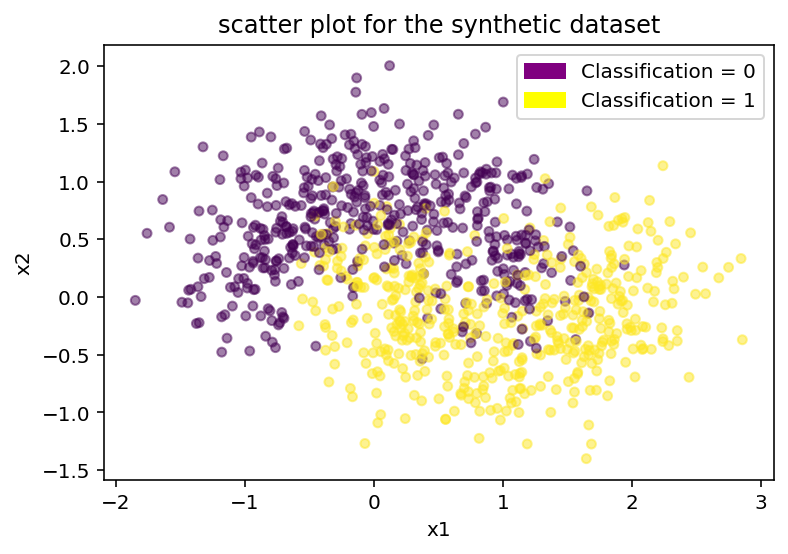

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
%matplotlib inline
from matplotlib  import patches

# Basic scatter plot
# make tne numpy array a pandas dataframe
ran_df = pd.DataFrame({'x1': X_q5[:, 0], 'x2': X_q5[:, 1], 'y': y_q5[:]})
# plot the scatter plot
p = plt.scatter('x1', 'x2', c = 'y', data = ran_df, s = 20, alpha = 0.5)
plt.title('scatter plot for the synthetic dataset')
plt.xlabel('x1')
plt.ylabel('x2')
purple_patch = patches.Patch(color='purple', label='Classification = 0')
yellow_patch = patches.Patch(color='yellow', label='Classification = 1')
plt.legend(handles=[purple_patch, yellow_patch])
plt.show()

(c)

In [12]:
# create 3 random sampled dataset with 100 samples
# create the list to record sample datasets
X_q5_sub = []
y_q5_sub = []

#create 3 random sampled dataset from the original dataset
for i in range(3):
    np.random.seed(100+i)
    choose = np.random.choice(1000, 100, replace = False)
    X_q5_sub.append( X_q5[ choose ,])
    y_q5_sub.append(y_q5[choose])

k_list = [1,25,50]

#fit the tree knn classifiers
#create the list to record knn classes
knn_sub = []
for j in range(9):
    knn_sub.append( KNeighborsClassifier(n_neighbors= k_list[j%3]))
    knn_sub[j].fit(X_q5_sub[ int(j/3) ], y_q5_sub[int(j/3) ])

(d) 

In [13]:
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
#https://www.tutorialspoint.com/matplotlib/matplotlib_subplots_function.htm

from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

# create the empty lists for use
X_min = []
X_max = []
X2_min = []
X2_max = []
XX = []
XX2 = []
y_sub = []

# prepare the data for the 9 plots
for i in range(9):
    # find the max and min x value for each knn class
    X_min.append(X_q5_sub[int(i/3)][:,0].min() -0.5)
    X_max.append(X_q5_sub[int(i/3)][:,0].max() +0.5)
    X2_min.append(X_q5_sub[int(i/3)][:,1].min() -0.5)
    X2_max.append(X_q5_sub[int(i/3)][:,1].max() +0.5)
    # create the evenly chunked list of each x range from x.min and x.max then apply meshgrid to it
    temp = np.meshgrid(np.arange(X_min[i], X_max[i], 0.01), np.arange(X2_min[i], X2_max[i], 0.01))
    XX.append(temp[0])
    XX2.append(temp[1])
    #make XX and XX2 a contiguous flattened array, combine them as columns, predict the y value for each x1, x2 set
    y_sub.append(knn_sub[i].predict(np.c_[XX[i].ravel(), XX2[i].ravel()]))
    # reshpe the predicted y value as the XX matrix
    y_sub[i] = y_sub[i].reshape(XX[i].shape)

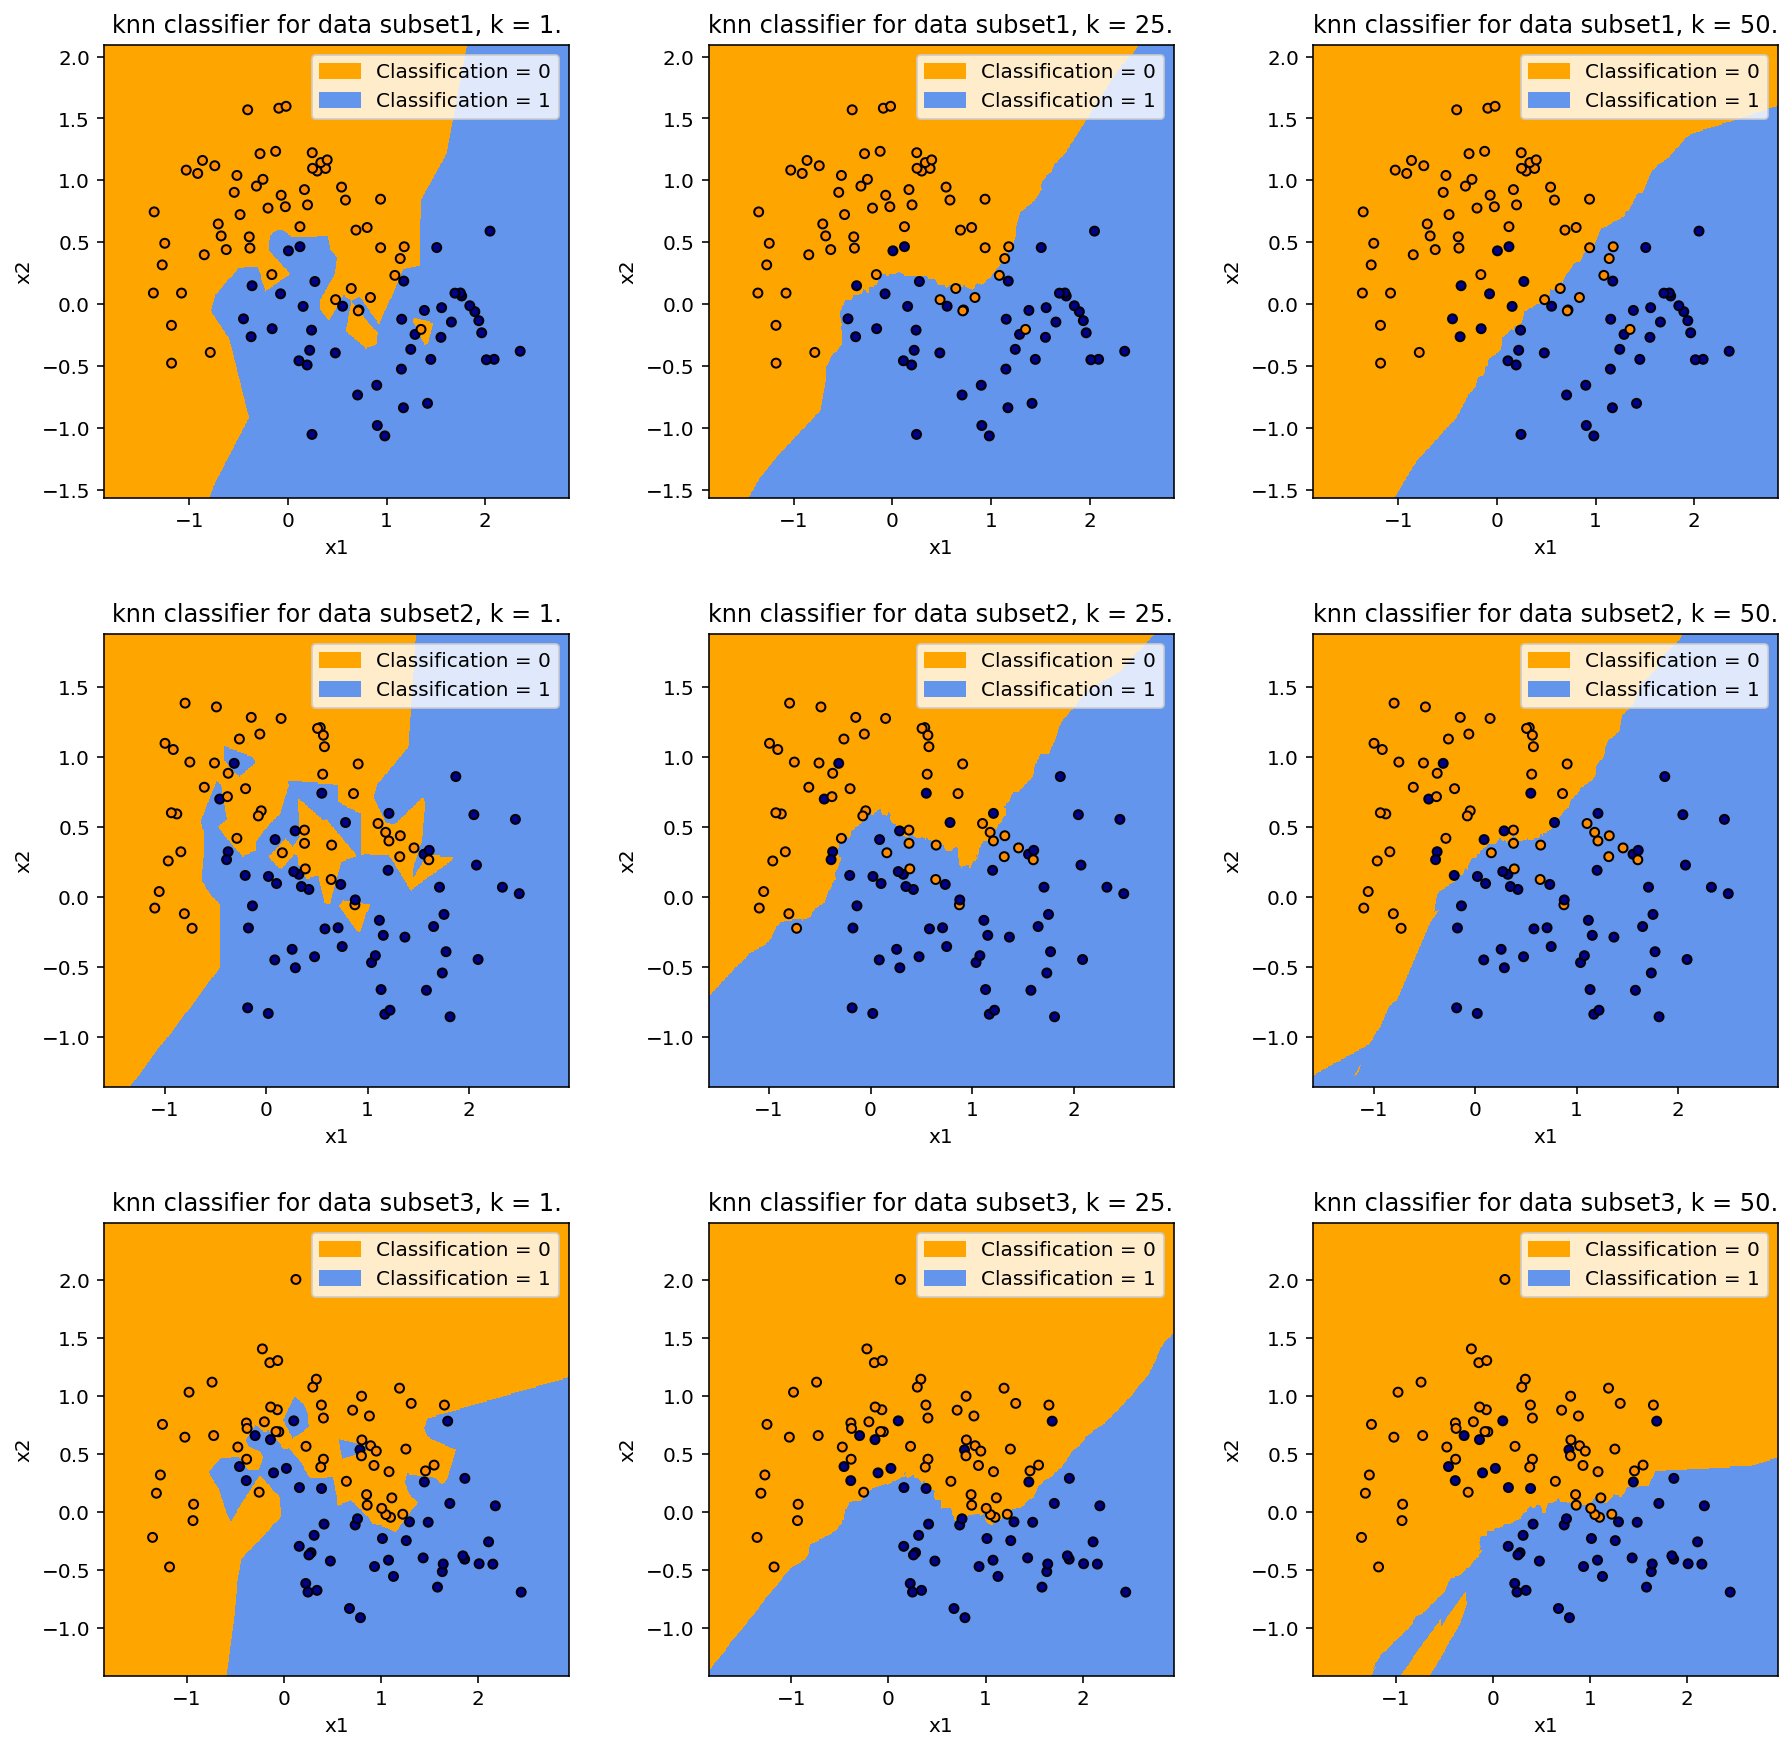

In [14]:
#create a new figure    
fig = plt.figure(figsize = [15,15])
# adjust the distance between figures
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for j in range(1, 10):
    # seperate the figure into 3x3 smaller space to plot and plot in the jth subplot
    fig.add_subplot(3, 3, j)
    plt.pcolormesh(XX[j-1], XX2[j-1], y_sub[j-1], cmap = cmap_light)
    # plot the data points on the graph
    plt.scatter(X_q5_sub[int((j-1)/3)][:,0], X_q5_sub[int((j-1)/3)][:,1], c= y_q5_sub[int((j-1)/3)], cmap=cmap_bold, edgecolor='k', s=20)
    #add legend
    orange_patch = patches.Patch(color='orange', label='Classification = 0')
    cornflowerblue_patch = patches.Patch(color='cornflowerblue', label='Classification = 1')
    plt.legend(handles=[orange_patch, cornflowerblue_patch])
    # set the x & y axis
    plt.xlim(XX[j-1].min(), XX[j-1].max())
    plt.ylim(XX2[j-1].min(), XX2[j-1].max())
    # set labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"knn classifier for data subset{int((j-1)/3) +1}, k = {k_list[(j-1)%3]}.")


(e)   
Between rows, the boundary of the colored area changes a lot based on the classification of the data points.  
Between columns, the boundary becomes more inflexible when k increases.  
Based on the graph, when the value of k is 25, the decision boundaries appear to best separate the two classes of data because it seems that the model predicted most of the data points correctly and the boundary still has some flexibility.
The decision boundaries vary the most when the k value equals to 1.

(f)
When the flexibility is high (k value is small), the bias is low. It shows on the graph that the color on the background always matches the classification of the data points. In this case, the variance is high since if we change the classification for any one point in the data, the background color, which indicates the predicted value, would change right away.

However, when the flexibility is low (k value is large), the bias is high. It shows on the graph that the color on the background seldom matches the classification of the data points. In this case, the variance is low since if we change the classification for any one point in the data, the background color, which indicates the predicted value, would not change right away. We need to change the classification of several points to change the predicted value area.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**  
(a)

In [15]:
train_x, train_y = X_q5, y_q5
test_x, test_y = datasets.make_moons(n_samples=1000, noise=0.35)

(b)

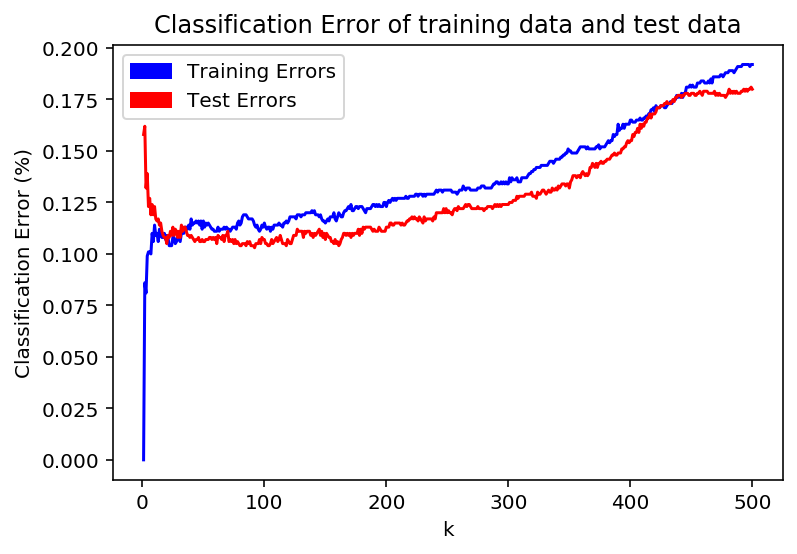

In [16]:
#the list of 500 knn classifier for k = 1~500
#list to record the classification error
error_train = []
error_test = []

#create 500 knn classifiers and prepare the data to plot the classification error
for i in range(500):      
    #train the classifiers
    knn = KNeighborsClassifier(n_neighbors= i+1)
    knn.fit(train_x, train_y)
    #predict train data
    knn_train = knn.predict(train_x)
    #predict test data
    knn_test = knn.predict(test_x)
    #calculate and record the classification error
    error_train.append(1-metrics.roc_auc_score(y_true= train_y, y_score = knn_train))
    error_test.append(1-metrics.roc_auc_score(y_true= test_y, y_score = knn_test))

# the value of x axis for the plot
k_500 = np.arange(1,501,1)

#plot the classification error
plt.plot(k_500, error_train, color = 'blue')
plt.plot(k_500, error_test, color = 'red')
blue_patch = patches.Patch(color='blue', label='Training Errors')
red_patch = patches.Patch(color='red', label='Test Errors')
plt.legend(handles=[blue_patch, red_patch])
plt.title("Classification Error of training data and test data")
plt.xlabel('k')
plt.ylabel('Classification Error (%)')
plt.show()

(c) When the value of k increases, the classification error for training data increases. However, for the test error, it drops when the value of k increases at first then increases again.

(d)
Large values of k represent high bias since the classification error for training data is large. Small values of k represent high variance since the classification error for training data is close to 0 and change in the training data would affect the prediction of classification right away.

In [17]:
print("(e)")
print(f"The optimal value of k is {np.argmin(error_test)+1} because we can get the minimum value of classification error for the test data when k = {np.argmin(error_test)+1}.")

(e)
The optimal value of k is 92 because we can get the minimum value of classification error for the test data when k = 92.


(f)  
For the linear model and the logistic model, the number of predictor variables included in the model would change the flexibility of the model. More predictor variables are included in the model, the more flexible the model is.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

(a)


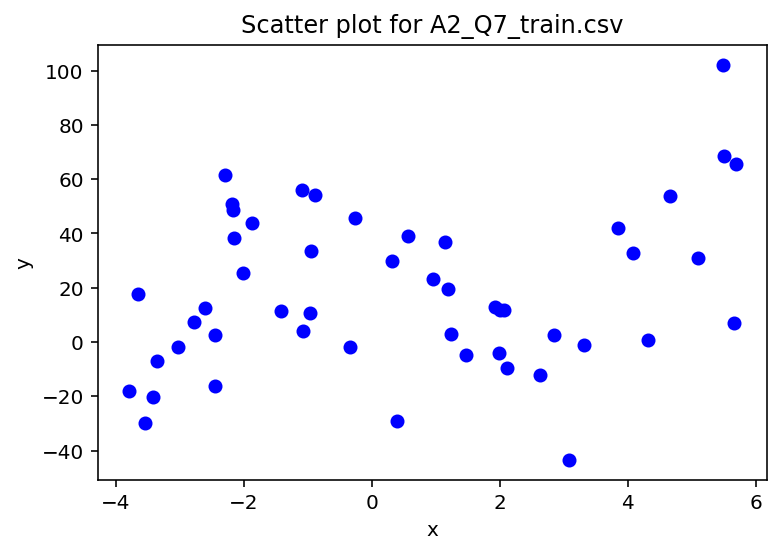

In [18]:
print('(a)')
A2_Q7_train = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_Q7_train.csv', delimiter=',', skip_header =1, usecols=(1,2))
A2_Q7_test = np.genfromtxt('/Users/yu/Documents/Duke/courses/20spring/IDS705 ML/HW/assingment2/A2_Q7_test.csv', delimiter=',', skip_header =1, usecols=(1,2))
plt.scatter(A2_Q7_train[:, 0], A2_Q7_train[:, 1], color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Scatter plot for A2_Q7_train.csv")
plt.show()

(b)

In [19]:
from sklearn.linear_model import LinearRegression
# fit the linear regression model
A2_Q7_train_x = A2_Q7_train[:, 0].reshape(-1, 1)
A2_Q7_train_y = A2_Q7_train[:, 1]

# train the linear model
reg = LinearRegression().fit(A2_Q7_train_x, A2_Q7_train_y)

# calculate the R^2
print("R-square:", reg.score( A2_Q7_train_x, A2_Q7_train_y))

# mean square error
print("mean square error:", metrics.mean_squared_error(A2_Q7_train_y, reg.predict(A2_Q7_train_x)))

# get the coefficient
print("coefficient: ", reg.coef_)

# get the intercept
print("intercept", reg.intercept_)

R-square: 0.06486123304769698
mean square error: 791.4167471701106
coefficient:  [2.59072826]
intercept 17.204928179405222


The estimated model:
$y = 17.20 + 2.59 x$

(c)

In [20]:
# add some transformed x value into the training dataset
A2_Q7_train_x_tran = A2_Q7_train_x

# add log(x)
# shift the x value to let all of them possitive then do log transformation
temp = np.log(A2_Q7_train_x + np.absolute(A2_Q7_train_x.min()) + 1)
A2_Q7_train_x_tran = np.c_[A2_Q7_train_x_tran, temp]

# add sin(x)
temp = np.sin(A2_Q7_train_x)
A2_Q7_train_x_tran = np.c_[A2_Q7_train_x_tran, temp]

# add x^2 and x^3
temp = np.square(A2_Q7_train_x)
A2_Q7_train_x_tran = np.c_[A2_Q7_train_x_tran, temp]
temp = np.power(A2_Q7_train_x, 3)
A2_Q7_train_x_tran = np.c_[A2_Q7_train_x_tran, temp]

In [21]:
# train the linear model with the three transformed x
# create the empty list that will record the linear regression functions with different input of x
reg_tran = []

# train the model based on different features
# x & log(x)
reg_tran.append(LinearRegression().fit(A2_Q7_train_x_tran[:, [0,1]], A2_Q7_train_y))
# x & sin()
reg_tran.append(LinearRegression().fit(A2_Q7_train_x_tran[:, [0,2]], A2_Q7_train_y))
# x & x^2 & x^3
reg_tran.append(LinearRegression().fit(A2_Q7_train_x_tran[:, [0,3,4]], A2_Q7_train_y))

For model of $y = a_0 + a_1 x + a_2 log(x)$ :

In [22]:
# calculate the R^2 and compare between different models
print("R-square:", reg_tran[0].score( A2_Q7_train_x_tran[:, [0,1]], A2_Q7_train_y))
# mean square error and compare between different models
print("mean square error:", metrics.mean_squared_error(A2_Q7_train_y, reg_tran[0].predict(A2_Q7_train_x_tran[:, [0,1]])))

R-square: 0.06963234922324923
mean square error: 787.3789066084018


For model of $y = a_0 + a_1 x + a_2 sin(x)$ :

In [23]:
# calculate the R^2 and compare between different models
print("R-square:", reg_tran[1].score( A2_Q7_train_x_tran[:, [0,2]], A2_Q7_train_y))
# mean square error and compare between different models
print("mean square error:", metrics.mean_squared_error(A2_Q7_train_y, reg_tran[1].predict(A2_Q7_train_x_tran[:, [0,2]])))

R-square: 0.27788613493259007
mean square error: 611.1317660806964


For model of $y = a_0 + a_1 x + a_2 x^2 + a_3 x^3$ :

In [24]:
# calculate the R^2 and compare between different models
print("R-square:", reg_tran[2].score( A2_Q7_train_x_tran[:, [0,3,4]], A2_Q7_train_y))
# mean square error and compare between different models
print("mean square error:", metrics.mean_squared_error(A2_Q7_train_y, reg_tran[2].predict(A2_Q7_train_x_tran[:, [0,3,4]])))
# get the coefficient and the intercept
print("coefficient: ", reg_tran[2].coef_)
print("intercept", reg_tran[2].intercept_)

R-square: 0.39633784112900705
mean square error: 510.8849713507123
coefficient:  [-9.25191526 -2.12568583  0.89700921]
intercept 24.155434157795064


The linear model best explains the training dataset is the model includes $x, x^2, x^3$ as predictor variables since the R-square is the largest and the mean square error is the smallest among the three models above.  
The model I choose here is as follows:
$y = 24.16 -9.25 x - 2.13 x^2 + 0.90 x^3$

(d)

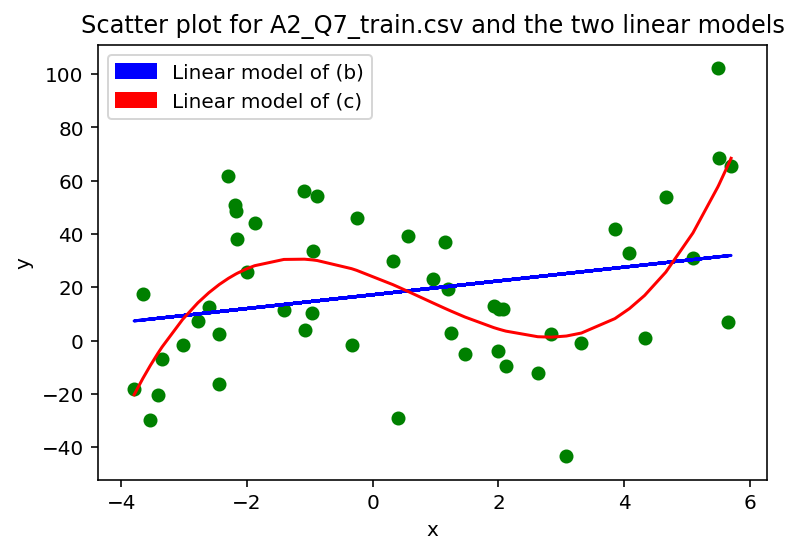

In [25]:
import operator

# draw the line of (b)
plt.plot(A2_Q7_train_x, reg.predict(A2_Q7_train_x), color = 'blue')
# draw the line of (c)
# create a callable (similar to function) that returns the 0th element in a list like object
sort_x_callable = operator.itemgetter(0)
# zip x and y and sort by the value of 0th column (sort by x)
sorted_x_y = sorted(zip(A2_Q7_train_x, reg_tran[2].predict(A2_Q7_train_x_tran[:, [0,3,4]])), key=sort_x_callable)
#unzip x and y
x_c_sorted, y_c_sorted = zip(*sorted_x_y)

# draw the line of (c)
plt.plot(x_c_sorted, y_c_sorted, color = 'red')
# set the legends
blue_patch_linear = patches.Patch(color='blue', label='Linear model of (b)')
red_patch_linear = patches.Patch(color='red', label='Linear model of (c)')
plt.legend(handles=[blue_patch_linear, red_patch_linear])
# plot the data points
plt.scatter(A2_Q7_train[:, 0], A2_Q7_train[:, 1], color = 'green')
# set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Scatter plot for A2_Q7_train.csv and the two linear models")
plt.show()

(e)

In [26]:
# create another names for the models in (b) & (c)
model_b = reg
model_c = reg_tran[2]

# seperate the x and y in the test dataset
A2_Q7_test_x = A2_Q7_test[:, 0].reshape(-1,1)
A2_Q7_test_y = A2_Q7_test[:, 1]

# predict the y value by model in (b)
model_b_pred_test = model_b.predict(A2_Q7_test_x)

# add x^2 and x^3 to the test x
A2_Q7_test_x_tran = A2_Q7_test_x
temp = np.square(A2_Q7_test_x)
A2_Q7_test_x_tran = np.c_[A2_Q7_test_x_tran, temp]
temp = np.power(A2_Q7_test_x, 3)
A2_Q7_test_x_tran = np.c_[A2_Q7_test_x_tran, temp]

# predict the y value by model in (c)
model_c_pred_test = model_c.predict(A2_Q7_test_x_tran)

print("The performance of model in (b) when applying it to the test data")
# calculate the R^2
print("\tR-square:", model_b.score(A2_Q7_test_x, A2_Q7_test_y))
# mean square error
print("\tmean square error:", metrics.mean_squared_error(A2_Q7_test_y, model_b_pred_test))

print("\nThe performance of model in (c) when applying it to the test data")
# calculate the R^2
print("\tR-square:", model_c.score(A2_Q7_test_x_tran, A2_Q7_test_y))
# mean square error
print("\tmean square error:", metrics.mean_squared_error(A2_Q7_test_y, model_c_pred_test))


The performance of model in (b) when applying it to the test data
	R-square: -0.132899284725984
	mean square error: 1116.6632365616088

The performance of model in (c) when applying it to the test data
	R-square: 0.22945384708541183
	mean square error: 759.5031373347688


(f) 
Model in (c) performs better on both the training data and the test data than the model in (b) because the datasets have a clear non-linear trend according to the scatter plot in (a). Therefore, a linear model includes predictor variables that can catch the non-linear trend would perform better on both training and test data sets.

(g) 
If the test data were significantly different from the training dataset, it would cut the predictive capability of all models trained by the training data because the parameters of the model we estimated based on the training data might not be able to explain the test data.